In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import  silhouette_score
from sklearn import datasets
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import dendrogram
from yellowbrick.cluster import SilhouetteVisualizer

%matplotlib inline 

from matplotlib import pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns

# Dimensionality Reduction 
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

C:\Users\paris\anaconda3\envs\py39\lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
C:\Users\paris\anaconda3\envs\py39\lib\site-packages\visions\backends\shared\nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:
C:\Users\paris\AppData\Local\Temp\ipykernel_34168\1172551912.py:15: DeprecationWarning: `import pandas_profiling` is going to be 

In [131]:
df_train = pd.read_csv('train.csv')

In [132]:
df_test = pd.read_csv('test.csv')

In [133]:
df_train.shape

(8068, 11)

In [134]:
df_test.shape

(2627, 10)

In [135]:
df_train['Profession'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing', nan], dtype=object)

In [136]:
df = pd.concat([df_train, df_test], axis=0).reset_index(drop=True)

In [137]:
df.shape

(10695, 11)

In [138]:
df.drop(['ID','Var_1','Segmentation','Work_Experience'], axis=1, inplace = True)

In [139]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Spending_Score,Family_Size
0,Male,No,22,No,Healthcare,Low,4.0
1,Female,Yes,38,Yes,Engineer,Average,3.0
2,Female,Yes,67,Yes,Engineer,Low,1.0
3,Male,Yes,67,Yes,Lawyer,High,2.0
4,Female,Yes,40,Yes,Entertainment,High,6.0


### Data Cleaning/Preprocessing

In [140]:
df.isna().sum()/len(df)

Gender            0.000000
Ever_Married      0.017765
Age               0.000000
Graduated         0.009537
Profession        0.015147
Spending_Score    0.000000
Family_Size       0.041889
dtype: float64

In [141]:
df.describe()

,Age,Family_Size
count,10695.000000,10247.000000
mean,43.511828,2.844052
std,16.774158,1.536427
min,18.000000,1.000000
25%,30.000000,2.000000
50%,41.000000,3.000000
75%,53.000000,4.000000
max,89.000000,9.000000


In [142]:
df.dropna(inplace = True)

In [143]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Spending_Score,Family_Size
0,Male,No,22,No,Healthcare,Low,4.0
1,Female,Yes,38,Yes,Engineer,Average,3.0
2,Female,Yes,67,Yes,Engineer,Low,1.0
3,Male,Yes,67,Yes,Lawyer,High,2.0
4,Female,Yes,40,Yes,Entertainment,High,6.0


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9844 entries, 0 to 10694
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          9844 non-null   object 
 1   Ever_Married    9844 non-null   object 
 2   Age             9844 non-null   int64  
 3   Graduated       9844 non-null   object 
 4   Profession      9844 non-null   object 
 5   Spending_Score  9844 non-null   object 
 6   Family_Size     9844 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 615.2+ KB


### One Hot Encoding / Dummies 

In [145]:
df['Gender'] = df['Gender'].replace({'Male':1, 'Female':0})
df['Ever_Married'] = df['Ever_Married'].replace({'Yes':1, 'No':0})
df['Spending_Score'] = df['Spending_Score'].replace({'Low':1, 'Average':2, 'High': 3})

In [146]:
df['Graduated'] = df['Graduated'].replace({'Yes':1, 'No':0})

In [147]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Spending_Score,Family_Size
0,1,0,22,0,Healthcare,1,4.0
1,0,1,38,1,Engineer,2,3.0
2,0,1,67,1,Engineer,1,1.0
3,1,1,67,1,Lawyer,3,2.0
4,0,1,40,1,Entertainment,3,6.0


In [148]:
encoded_df = pd.get_dummies(df, columns=['Profession'])

In [149]:
encoded_df.head()

,Gender,Ever_Married,Age,Graduated,Spending_Score,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,1,0,22,0,1,4.0,0,0,0,0,0,1,0,0,0
1,0,1,38,1,2,3.0,0,0,1,0,0,0,0,0,0
2,0,1,67,1,1,1.0,0,0,1,0,0,0,0,0,0
3,1,1,67,1,3,2.0,0,0,0,0,0,0,0,1,0
4,0,1,40,1,3,6.0,0,0,0,1,0,0,0,0,0


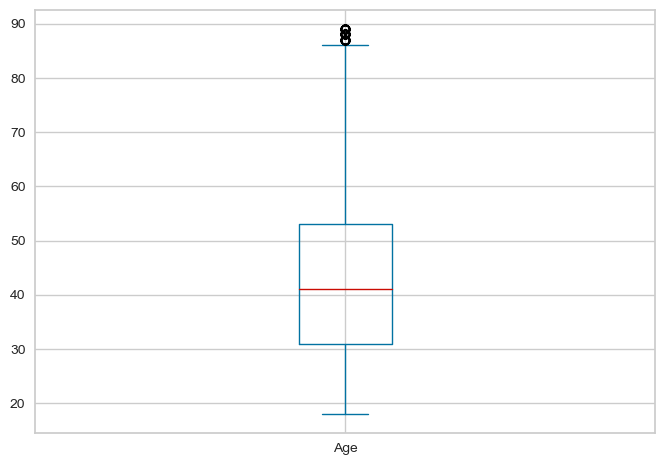

In [150]:
'''box plot of all features, excluding ID'''
encoded_df['Age'].plot(kind='box')
None

<Axes: >

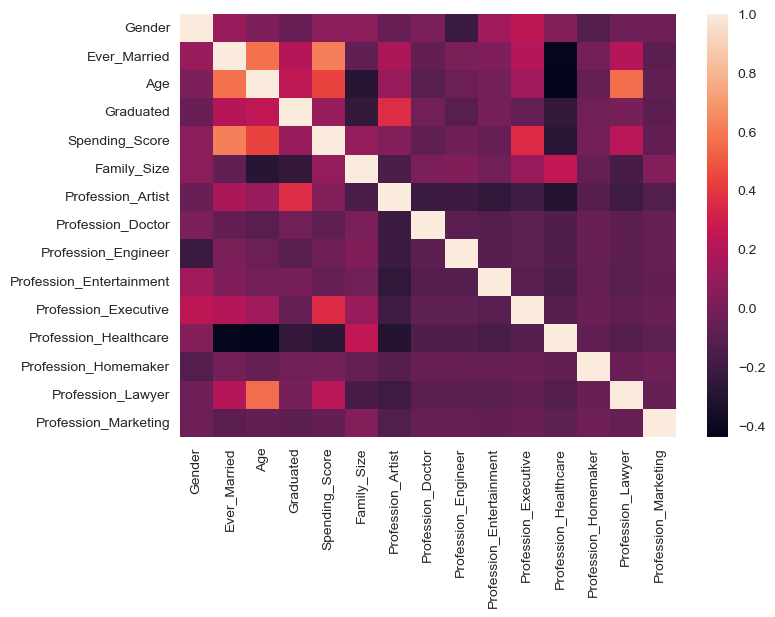

In [151]:
corr = encoded_df.corr()
sns.heatmap(corr)

In [23]:
# threshold = 0.50

In [24]:
# mask = corr.mask(np.tril(np.ones(corr.shape)).astype(np.bool))

In [25]:
# columns_to_drop = [col for col in mask.columns if any(mask[col] > threshold)]

In [26]:
# columns_to_drop

In [27]:
encoded_df.describe()

,Gender,Ever_Married,Age,Graduated,Spending_Score,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
count,9844.000000,9844.000000,9844.000000,9844.000000,9844.000000,9844.000000,9844.000000,9844.000000,9844.000000,9844.000000,9844.000000,9844.000000,9844.000000,9844.000000,9844.000000
mean,0.550488,0.593052,43.548456,0.627895,1.553129,2.843255,0.322227,0.089090,0.088480,0.118143,0.074563,0.162434,0.028545,0.079338,0.037180
std,0.497470,0.491290,16.686598,0.483391,0.743095,1.533637,0.467353,0.284888,0.284007,0.322794,0.262699,0.368867,0.166533,0.270279,0.189212
min,0.000000,0.000000,18.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,31.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,41.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,53.000000,1.000000,2.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,89.000000,1.000000,3.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Scaling 

In [152]:
## Data Scaling 
scaler = StandardScaler()


scaler.fit(encoded_df[['Age','Family_Size']])

X_scaled = scaler.transform(encoded_df[['Age','Family_Size']])

X_scaled

array([[-1.29142867,  0.75428819],
       [-0.33252661,  0.10221012],
       [ 1.40548337, -1.20194601],
       ...,
       [ 0.56644407, -0.54986794],
       [ 0.2068558 ,  1.40636626],
       [-0.03286972,  0.10221012]])

In [153]:
og_df= encoded_df.copy()

In [154]:
# Convert the array to a DataFrame with a custom column name
encoded_df[['Age','Family_Size']] = scaler.transform(encoded_df[['Age','Family_Size']])

In [155]:
encoded_df.head()

,Gender,Ever_Married,Age,Graduated,Spending_Score,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,1,0,-1.291429,0,1,0.754288,0,0,0,0,0,1,0,0,0
1,0,1,-0.332527,1,2,0.102210,0,0,1,0,0,0,0,0,0
2,0,1,1.405483,1,1,-1.201946,0,0,1,0,0,0,0,0,0
3,1,1,1.405483,1,3,-0.549868,0,0,0,0,0,0,0,1,0
4,0,1,-0.212664,1,3,2.058444,0,0,0,1,0,0,0,0,0


In [156]:
from yellowbrick.cluster import KElbowVisualizer

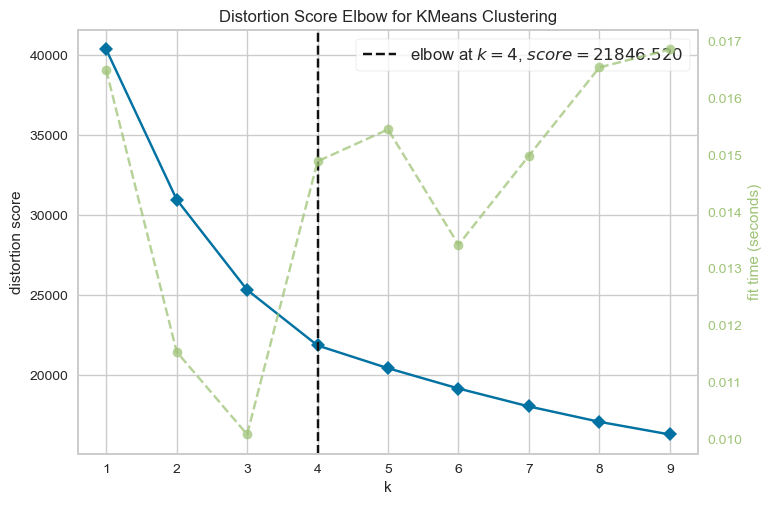

In [157]:
model = KMeans(n_init='auto')
visualizer = KElbowVisualizer(model, k=(1,10), locate_elbow=True)

visualizer.fit(encoded_df)
visualizer.poof()
plt.show()

In [34]:
from scipy.cluster.hierarchy import fcluster

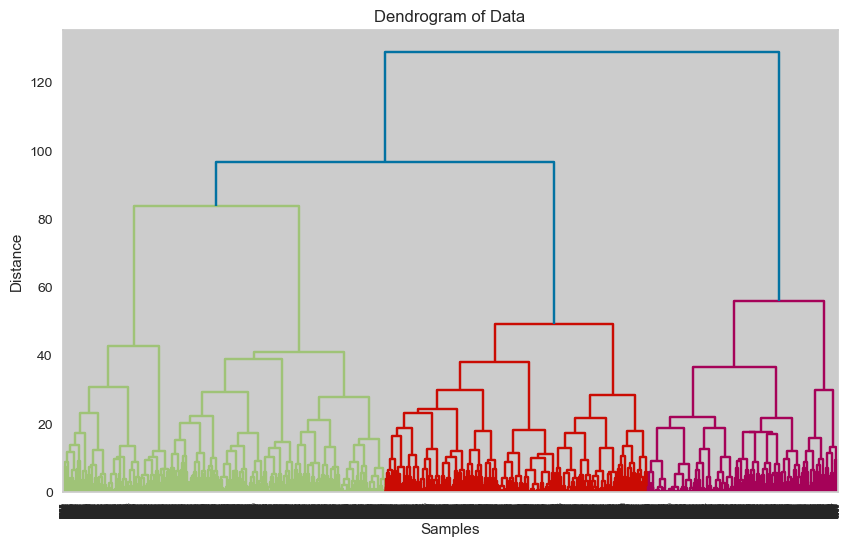

In [35]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt




# Perform hierarchical clustering
linked = linkage(encoded_df, 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('Dendrogram of Data')
plt.show()

In [158]:
num_clusters = 4
labels = fcluster(linked, num_clusters, criterion='maxclust')

plt.show()

# Print the cluster labels
print(labels)

[1 2 2 ... 2 3 1]


In [159]:
encoded_df['cluster_labels'] = labels
og_df['cluster_labels'] = labels

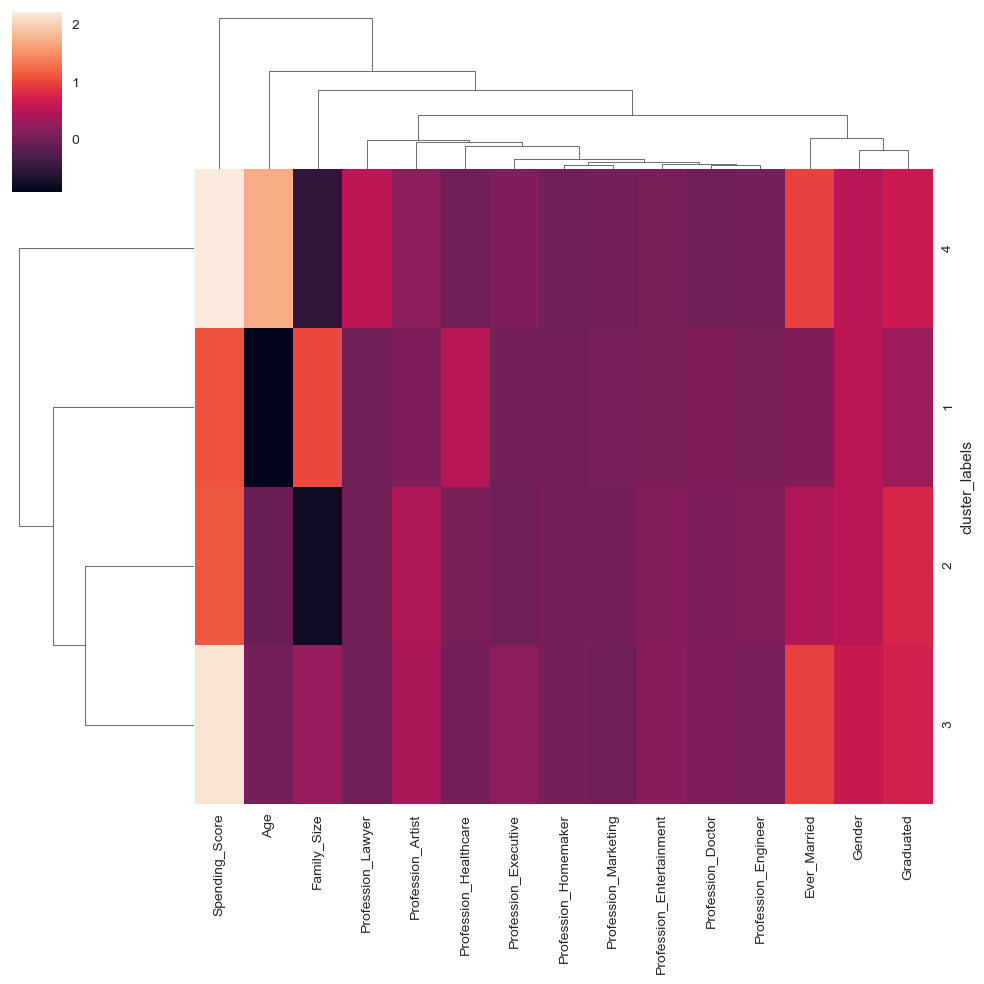

In [38]:
'''calc corr'''
cluster_4_df = encoded_df.groupby('cluster_labels').mean()
sns.clustermap(cluster_4_df)

In [47]:
og_df.groupby('cluster_labels').mean()

,Gender,Ever_Married,Age,Graduated,Spending_Score,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
cluster_labels,,,,,,,,,,,,,,,
1,0.524106,0.110141,28.510806,0.309227,1.088113,4.424356,0.100582,0.119701,0.084372,0.080216,0.017456,0.509144,0.013300,0.003741,0.071488
2,0.511244,0.468966,42.358021,0.769415,1.120540,1.651874,0.455772,0.093853,0.138831,0.137031,0.006597,0.079760,0.041379,0.005697,0.041079
3,0.640131,0.979644,44.078153,0.721556,2.159215,3.288622,0.414758,0.098873,0.061069,0.148673,0.195202,0.034896,0.037077,0.001818,0.007634
4,0.511834,0.971893,72.167899,0.655325,2.214497,2.062130,0.198964,0.002959,0.027367,0.076923,0.098373,0.008876,0.006657,0.553254,0.026627


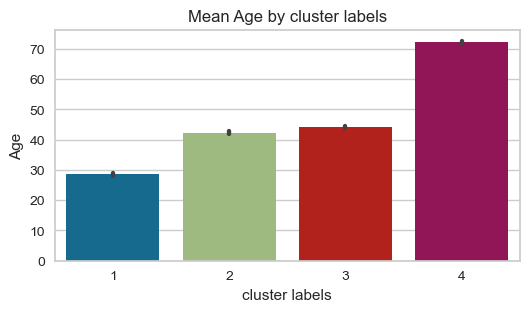

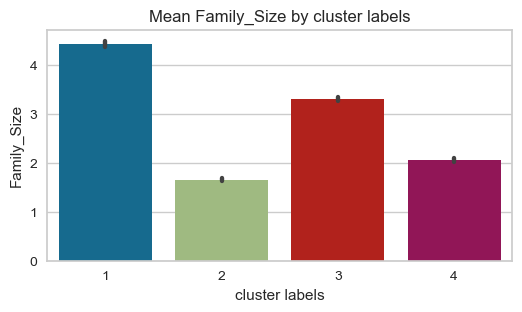

In [165]:
cluster_means = og_df[['cluster_labels','Age', 'Family_Size']].groupby('cluster_labels').mean()


# Plot bar plots for each column
for column in cluster_means.columns:
    plt.figure(figsize=(6, 3))
    sns.barplot(x='cluster_labels', y=column, data=og_df)
    plt.xlabel('cluster labels')
    plt.ylabel(column)
    plt.title(f'Mean {column} by cluster labels')
plt.show()

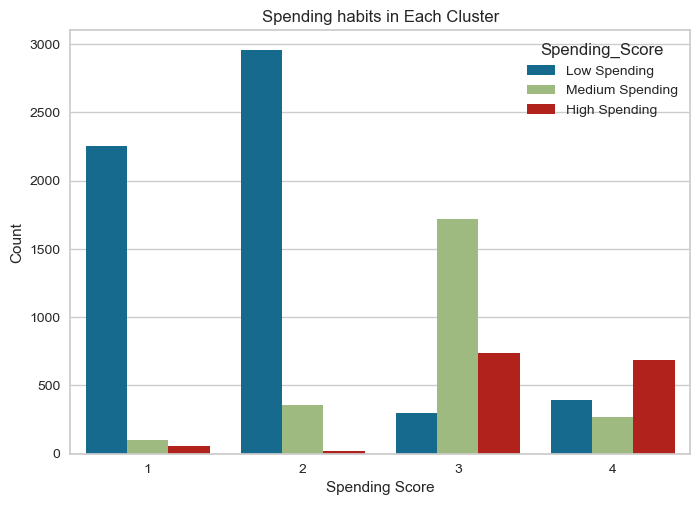

In [160]:
og_df['Spending_Score'] = og_df['Spending_Score'].replace({1: 'Low Spending', 2: 'Medium Spending', 3: 'High Spending'})

sns.countplot(x='cluster_labels', hue='Spending_Score', data=og_df)

# Set plot labels
plt.xlabel('Spending Score')
plt.ylabel('Count')
plt.title('Spending habits in Each Cluster')

# Show the plot
plt.show()

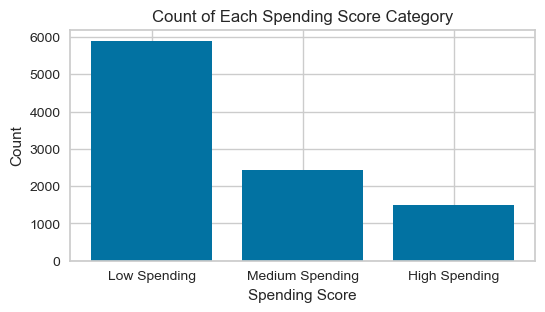

In [163]:
import matplotlib.pyplot as plt

# Assuming 'og_df' is your DataFrame and 'Spending_Score' column has the spending score categories

# Count the occurrences of each spending score category
spending_counts = og_df['Spending_Score'].value_counts()

# Create a bar plot
plt.figure(figsize=(6, 3))
plt.bar(x=spending_counts.index, height=spending_counts.values)

# Set plot labels
plt.xlabel('Spending Score')
plt.ylabel('Count')
plt.title('Count of Each Spending Score Category')

# Show the plot
plt.show()


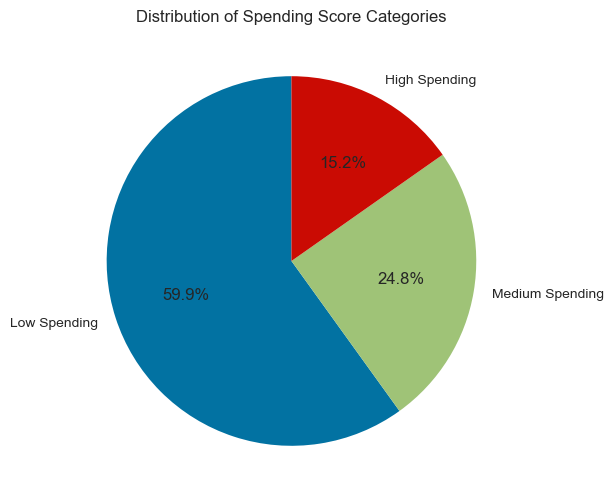

In [164]:
import matplotlib.pyplot as plt

# Assuming 'og_df' is your DataFrame and 'Spending_Score' column has the spending score categories

# Count the occurrences of each spending score category
spending_counts = og_df['Spending_Score'].value_counts()

# Create a pie plot
plt.figure(figsize=(6, 6))
plt.pie(spending_counts.values, labels=spending_counts.index, autopct='%1.1f%%', startangle=90)

# Set plot title
plt.title('Distribution of Spending Score Categories')

# Show the plot
plt.show()


In [129]:
og_df

,Gender,Ever_Married,Age,Graduated,Spending_Score,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,cluster_labels
0,1,0,22,0,1.0,4.0,0,0,0,0,0,1,0,0,0,1
1,0,1,38,1,NaN,3.0,0,0,1,0,0,0,0,0,0,2
2,0,1,67,1,NaN,1.0,0,0,1,0,0,0,0,0,0,2
3,1,1,67,1,NaN,2.0,0,0,0,0,0,0,0,1,0,4
4,0,1,40,1,3.0,6.0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10690,1,0,29,0,1.0,4.0,0,0,0,0,0,1,0,0,0,1
10691,0,0,35,1,1.0,1.0,0,1,0,0,0,0,0,0,0,2
10692,0,0,53,1,1.0,2.0,0,0,0,1,0,0,0,0,0,2
10693,1,1,47,1,3.0,5.0,0,0,0,0,1,0,0,0,0,3


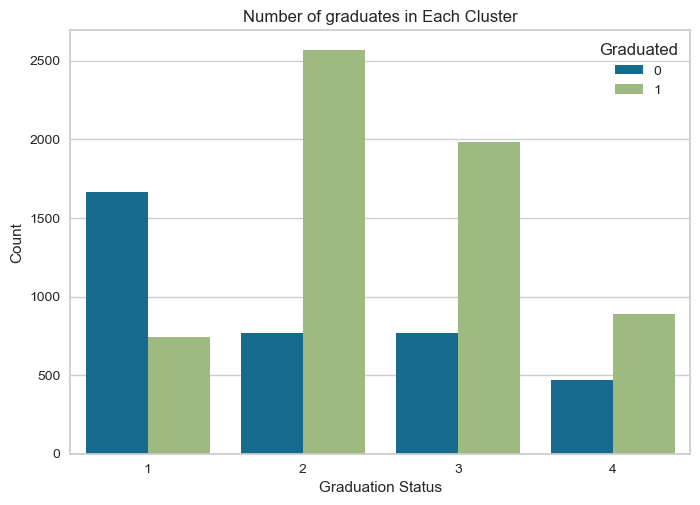

In [119]:
sns.countplot(x='cluster_labels', hue='Graduated', data=og_df)

# Set plot labels
plt.xlabel('Graduation Status')
plt.ylabel('Count')
plt.title('Number of graduates in Each Cluster')

# Show the plot
plt.show()

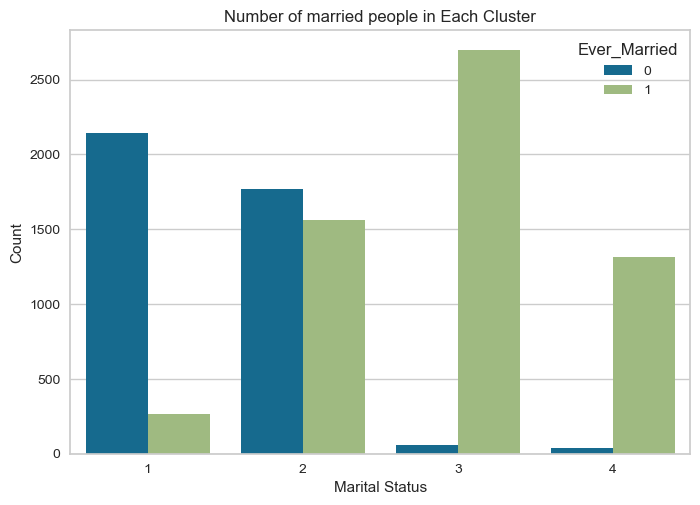

In [120]:
sns.countplot(x='cluster_labels', hue='Ever_Married', data=og_df)

# Set plot labels
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Number of married people in Each Cluster')

# Show the plot
plt.show()

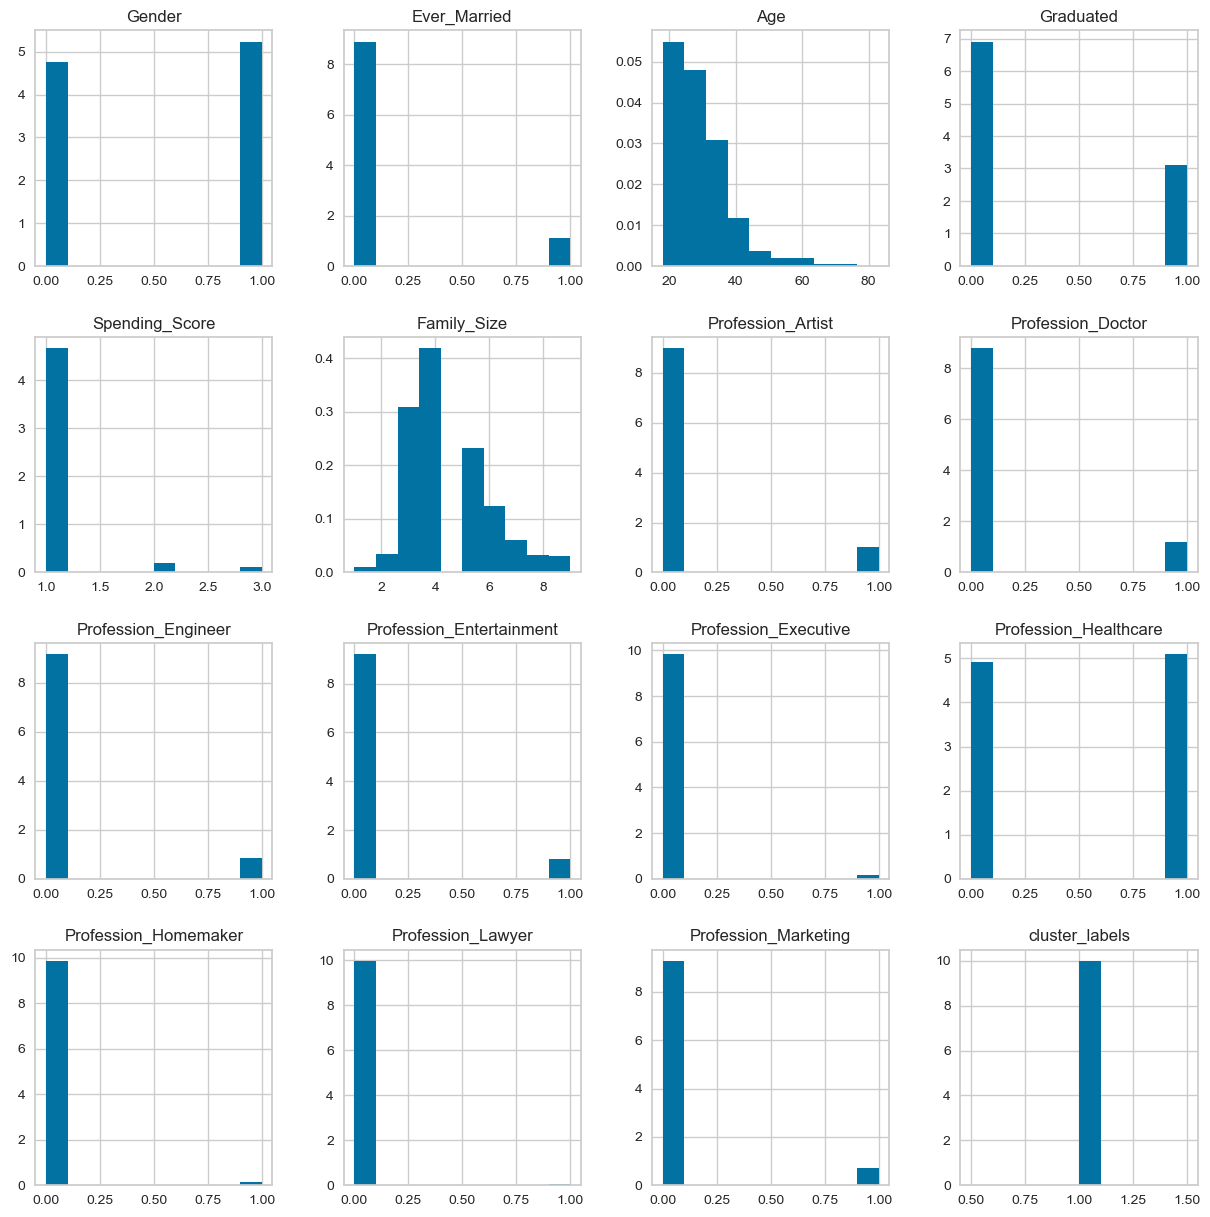

In [104]:
hs1 = og_df[og_df['cluster_labels'] == 1].hist(figsize=(15,15), density=True)

# plt.show()

In [118]:
df_train['Profession'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing', nan], dtype=object)


         ❤️     ❤️
       ❤️   ❤️   ❤️
      ❤️     ❤️    ❤️
       ❤️         ❤️
        ❤️       ❤️
          ❤️   ❤️
            ❤️
    


# Great work team!